In [42]:
from tifffile import TiffFile
from torch.utils.data import Dataset
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from model.data_loader import *
from utils import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## `.tif` files

First of all our data is in `.tif` files. We somehow need to read them. We can do this with `tifffile`:

- to get a `numpy` array we use `asarray()` method;
- we get our `30` images with `512x512` resolution;
- we get 'an image with scalar data' and we have to visualize it using a colormap;

In [3]:
! ls ~/data/isbi2012/

test-volume.tif  train-labels.tif train-volume.tif


In [4]:
data_dir = Path.home() / 'data/isbi2012/'

In [5]:
images = TiffFile(data_dir / 'train-volume.tif').asarray()

In [6]:
type(images), images.shape

(numpy.ndarray, (30, 512, 512))

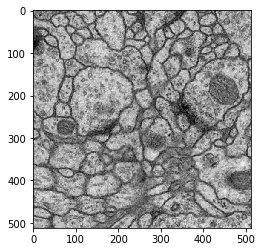

In [7]:
plt.imshow(images[0], cmap='gray');

## dataset

We create class `ISBI2012Dataset` as usual: it's based on `Dataset` and implements 2 method: `__len__` and `__getitem__`.

In [30]:
train_dataset = ISBI2012Dataset(path_img=data_dir / 'train-volume.tif',
                                path_target=data_dir / 'train-labels.tif',
                                split='train')

In [31]:
len(train_dataset)

25

In [32]:
train_dataset.images.shape, train_dataset.targets.shape

((25, 512, 512, 1), (25, 512, 512, 1))

In [34]:
img, target = train_dataset[0]

In [35]:
img.shape, target.shape

((512, 512, 1), (512, 512, 1))

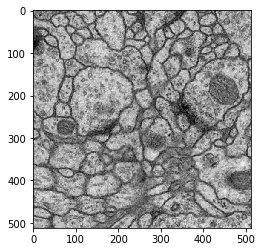

In [36]:
plt.imshow(img.squeeze(), cmap='gray');

In [37]:
val_dataset = ISBI2012Dataset(path_img=data_dir / 'train-volume.tif',
                              path_target=data_dir / 'train-labels.tif',
                              split='val')

In [38]:
len(val_dataset)

5

In [39]:
img, target = val_dataset[0]

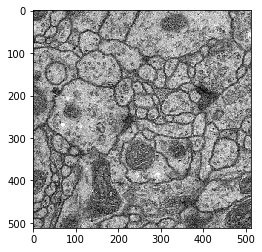

In [40]:
plt.imshow(img.squeeze(), cmap='gray');

## dataloader

In [49]:
json_path = 'experiments/base_model/params.json'
params = Params(json_path)

In [50]:
params.dict

{'learning_rate': 0.001,
 'batch_size': 1,
 'num_epochs': 10,
 'dropout_rate': 0.8,
 'num_channels': 32,
 'save_summary_steps': 100,
 'num_workers': 0,
 'cuda': 0}

In [52]:
params.batch_size, params.cuda

(1, 0)

In [54]:
dataloaders = fetch_dataloader(['train', 'test'], params)

In [55]:
dataloaders.keys()

dict_keys(['train', 'test'])

In [56]:
train_loader = dataloaders['train']

In [57]:
img, target = next(iter(train_loader))

In [58]:
img.shape, target.shape

(torch.Size([1, 1, 512, 512]), torch.Size([1, 1, 512, 512]))

In [59]:
img = img.squeeze().numpy()

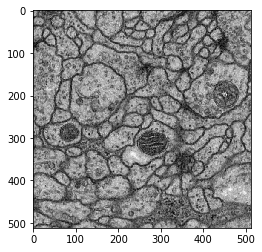

In [60]:
plt.imshow(img, cmap='gray');

In [62]:
test_loader = dataloaders['test']